In [1]:
from qiskit import *

In [2]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

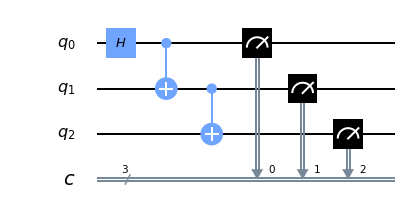

In [4]:
%matplotlib inline
circuit.draw(output = 'mpl')

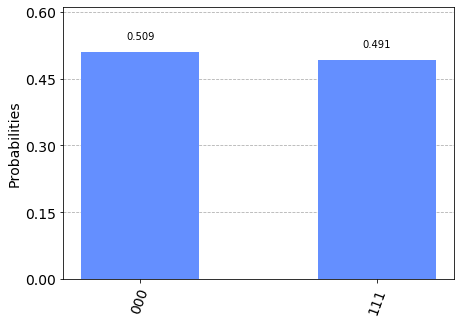

In [7]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots=1024).result()

from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuit))


In [8]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmqx2')

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\models\backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


In [10]:
job = execute(circuit,backend = device, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5e13be76eb038400117ea8c1
Job Status: job has successfully run


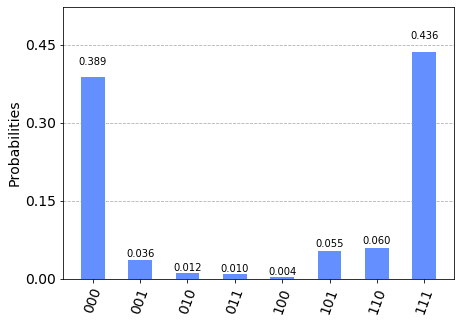

In [11]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [12]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)


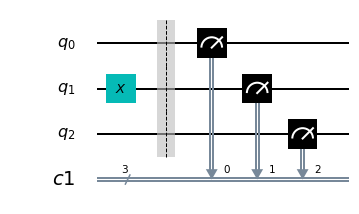

In [14]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')
cal_circuits[2].draw(output = 'mpl')

In [15]:
len(cal_circuits)

8

In [17]:
cal_job = execute(cal_circuits, backend = device, shots = 1024, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_reults = cal_job.result()

5e13c02ed43b6f0011eb6a46
Job Status: job has successfully run


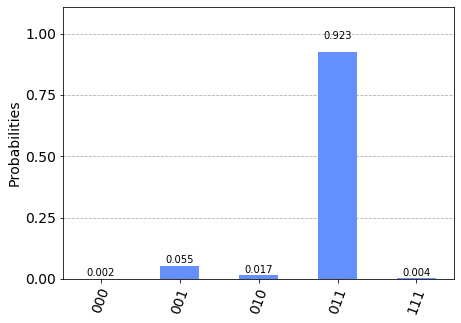

In [20]:
plot_histogram(cal_reults.get_counts(cal_circuits[3]))